In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = 'top_10000_movies.csv'

In [3]:
df = pd.read_csv(data, lineterminator='\n', index_col='index')

In [4]:
df.head()

,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
index,,,,,,,,,,,,
0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


## EDA

Check the shape of the data

In [5]:
df.shape

(10014, 12)

Let's check the type of each column and how many non-values there are in them

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10014 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10002 non-null  float64
 1   original_language  10002 non-null  object 
 2   original_title     10001 non-null  object 
 3   popularity         10000 non-null  float64
 4   release_date       9962 non-null   object 
 5   vote_average       10000 non-null  float64
 6   vote_count         10000 non-null  float64
 7   genre              10000 non-null  object 
 8   overview           9900 non-null   object 
 9   revenue            9998 non-null   float64
 10  runtime            9989 non-null   float64
 11  tagline            7079 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1017.0+ KB


The id column does not give any usefull information about the movies so lets remove it

In [7]:
df.drop(['id'], axis=1, inplace=True)

First check the statistics of the numerical data 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,10000.0,3.451687e+01,1.006940e+02,6.269,11.908,17.488,2.962625e+01,5.401308e+03
vote_average,10000.0,6.298750e+00,1.434260e+00,0.000,5.900,6.500,7.100000e+00,9.500000e+00
vote_count,10000.0,1.315085e+03,2.501899e+03,0.000,118.000,425.500,1.297250e+03,3.018400e+04
revenue,9998.0,5.737536e+07,1.480897e+08,0.000,0.000,593124.000,4.768796e+07,2.847246e+09
runtime,9989.0,9.879277e+01,2.877153e+01,0.000,89.000,99.000,1.130000e+02,4.000000e+02


The release_date is in object Dtype lets chance it to dtype "datetime64"

In [9]:
df.release_date = pd.to_datetime(df.release_date, format="%Y-%m-%d")

In [10]:
df.release_date.dtype

dtype('<M8[ns]')

Checking for the missing values

In [11]:
df.isnull().sum()

original_language      12
original_title         13
popularity             14
release_date           52
vote_average           14
vote_count             14
genre                  14
overview              114
revenue                16
runtime                25
tagline              2935
dtype: int64

And now for the duplicate rows

In [12]:
df.duplicated().sum()

11

Let's remove the duplicate values from the dataset

In [13]:
df.drop_duplicates(inplace=True)

## Data Visualization

First we create some histograms of the numerical data

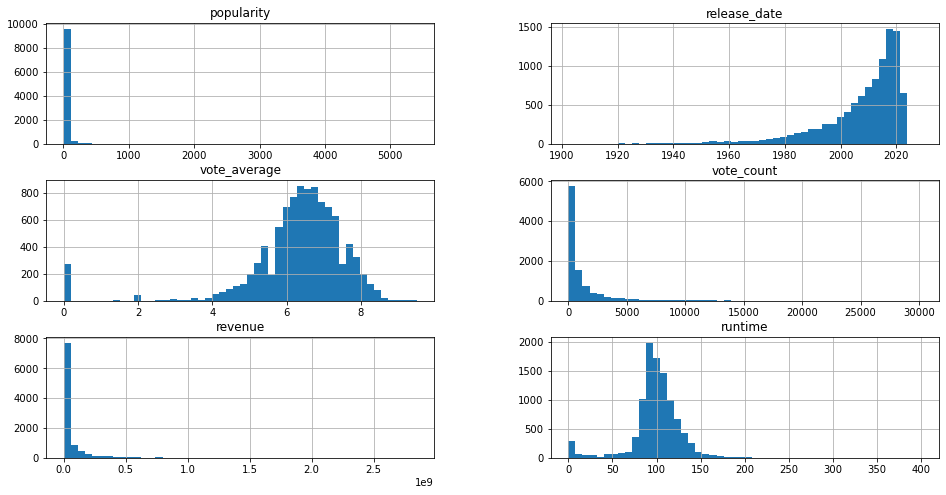

In [14]:
df.hist(bins=50, figsize=(16,8))
plt.show()

Now some correlation matrix between the categorical features 

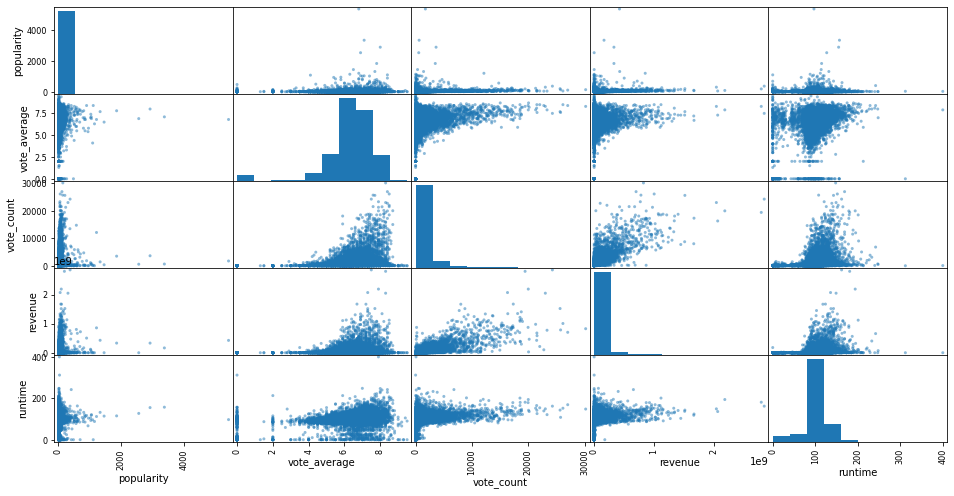

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(16,8))
plt.show()

And the correlation matrix

In [16]:
df.corr()

,popularity,vote_average,vote_count,revenue,runtime
popularity,1.000000,0.053540,0.127125,0.156015,0.028713
vote_average,0.053540,1.000000,0.246775,0.144922,0.389529
vote_count,0.127125,0.246775,1.000000,0.771694,0.298711
revenue,0.156015,0.144922,0.771694,1.000000,0.259220
runtime,0.028713,0.389529,0.298711,0.259220,1.000000


Let's make some graphs checking the different categorical features

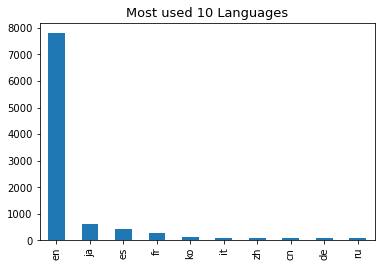

In [17]:
plt.figure()
df.original_language.value_counts().head(10).plot(kind='bar')
plt.title('Most used 10 Languages', size=13)
plt.show()

Now check the most common movies in data set

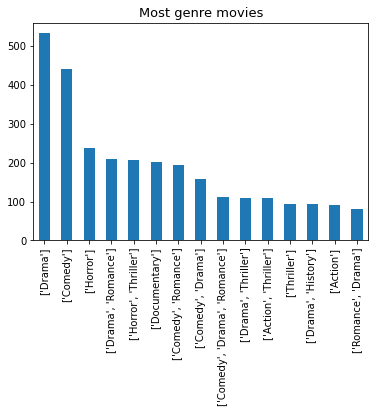

In [19]:
plt.figure()
df[df.genre != "[]"].genre.value_counts().head(15).plot(kind='bar')
plt.title('Most genre movies', size=13)
plt.show()